# Graded Assignment - 2


Welcome to your second graded assignment! 

Along with this notebook, you will find a dataset assigned to you. You will be required to perform the following tasks on the dataset:
- Briefly describe the variables/columns/features in the dataset
- Come up with 3 possible questions that you can try to answer about the scenario using the available dataset
- Perform data cleaning checks 
- Use built-in functions or create your own where necessary to carry out computations 
- Attempt to answer your own questions using the EDA techniques you learned and with each answer, include a visual you learned in class to summarize your findings.

**BONUS QUESTION**: There is another file called noc_regions.csv available alongside for reference. This is the mapping for the 3-letter NOC code in your original dataset i.e. country names are abbreviated in the original dataset, the full forms are available in this reference file. Can you map out the data in that file to your original data's respective column (NOC)? (Hint Pandas Join)

There's a lot of free room to experiment. Remember, there's no one way to do the right thing. You will be graded on:
- Approach (30%)
- Syntax and code (30%)
- Findings and Visuals (30%)
- Presentation and Readability (10%)

Best of Luck!

## Olympics Atheletes Dataset 
This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016 from www.sports-reference.com in May 2018. 

Dataset can be downloaded from here: https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results

Following are the columns in the dataset:
- ID - Unique number for each athlete
- Name - Athlete's name
- Sex - M or F
- Age - Integer
- Height - In centimeters
- Weight - In kilograms
- Team - Team name
- NOC - National Olympic Committee 3-letter code
- Games - Year and season
- Year - Integer
- Season - Summer or Winter
- City - Host city
- Sport - Sport
- Event - Event
- Medal - Gold, Silver, Bronze, or NA

### Clean your dataset 

Perform your required actions within the data cleaning checklist here.

In [2]:
# import statements and reading data file  
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


# add path as required
file = 'athlete_events.csv'
data = pd.read_csv(file)

# supplementary file for Bonus Question
sup_file = 'noc_regions.csv'
sup_data = pd.read_csv(sup_file)

### Step 1: Check for NaN Values

In [3]:
#check data
pd.DataFrame(data)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [4]:
#check for Null/NaN values 
data.isna().any()

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
dtype: bool

In [5]:
#dropping na values
dropped_data=data.dropna()
print(dropped_data.shape)

(30181, 15)


### Step 2: Check for correct data types

In [6]:
#checking for data types
dropped_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30181 entries, 40 to 271103
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30181 non-null  int64  
 1   Name    30181 non-null  object 
 2   Sex     30181 non-null  object 
 3   Age     30181 non-null  float64
 4   Height  30181 non-null  float64
 5   Weight  30181 non-null  float64
 6   Team    30181 non-null  object 
 7   NOC     30181 non-null  object 
 8   Games   30181 non-null  object 
 9   Year    30181 non-null  int64  
 10  Season  30181 non-null  object 
 11  City    30181 non-null  object 
 12  Sport   30181 non-null  object 
 13  Event   30181 non-null  object 
 14  Medal   30181 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 3.7+ MB


In [7]:
#Results of the data types seem according to my expectations. Hence, moving forward with the next step

### Step 3: Check For Duplicate Values

In [8]:
#checking for duplicate values
dropped_data[dropped_data.duplicated(subset=['ID','Name','Age','Year','Event'],keep=False)]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal


In [9]:
#Hence Concluded that they aren't any duplicate values in the dataset


fixed_data = dropped_data

## Asking Basic Questions

> QUESTION 1: Which country has the most Gold medalists? 

(Hint Filter by Gold Then Summarize by Country)

> QUESTION 2: Do Female Atheletes win more Medals than their Male Counterparts? 

(Hint Exlude NA from Medals then Summarize by Gender)

> QUESTION 3: How many of the Medals have been won by Pakistan? Summarize Pakistan's Medals by Medal Type 

(Hint Filter By Pakistan then Take Count of Non-NA Medals, to answer second part Filter the Original Data for Pakistan and Then Summarize by Medal type)

With each question, you are required to have two cells:
1. Answering the question using code (Pandas)
2. Visualizing your results (Matplotlib or Seaborn)

#### Answer 1
Q1. Which country has the most gold medalists?

In [10]:
gold_countries= fixed_data[fixed_data['Medal']=='Gold'].groupby('NOC')
gold_count=gold_countries['Team'].count().sort_values(ascending=False).head(10)

gold_count

NOC
USA    2115
URS     982
GER     547
GDR     396
RUS     379
CAN     362
CHN     350
GBR     330
AUS     319
ITA     315
Name: Team, dtype: int64

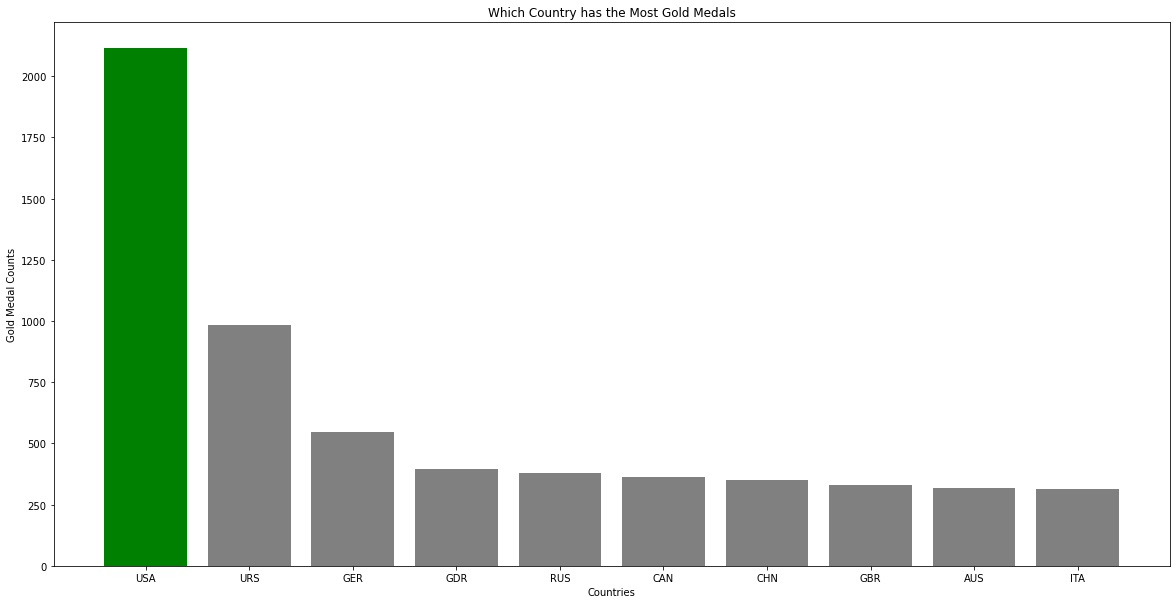

In [11]:
#Visualization
plt.rcParams['figure.figsize']=(20,10)

#custom function for colorization
def color_func(color_counts):
    x=[]
    max_val=0
    for i in range(len(color_counts.index)):
        if max_val<color_counts.values[i]:
            max_val=color_counts.values[i]
            x.append('green')
        else:
            x.append('grey')
    return x


fig=plt.bar(x=gold_count.index, height=gold_count.values,color=color_func(gold_count))
plt.title('Which Country has the Most Gold Medals')
plt.xlabel('Countries')
plt.ylabel('Gold Medal Counts')
plt.show()

Hence concluded that United States has the most medals according to the dataset

#### Answer 2
Q2. Do Female Atheletes win more Medals than their Male Counterparts?

In [12]:
gender=fixed_data.groupby('Sex')
gender_count=gender['Sex'].count().sort_values(ascending=False)

gender_count

Sex
M    19831
F    10350
Name: Sex, dtype: int64

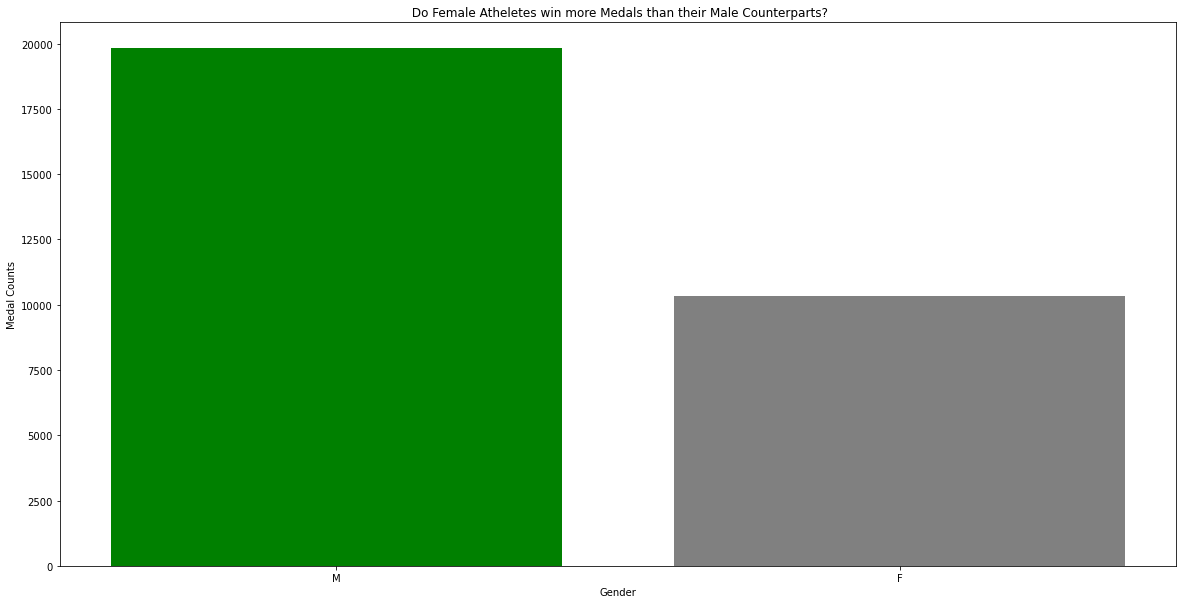

In [13]:
#visualization
fig=plt.bar(x=gender_count.index, height=gender_count.values,color=color_func(gender_count))
plt.title(' Do Female Atheletes win more Medals than their Male Counterparts?')
plt.xlabel('Gender')
plt.ylabel('Medal Counts')
plt.show()

No, female athletes don't have more medals than their counterparts

#### Answer 3
Q3. How many of the Medals have been won by Pakistan? Summarize Pakistan's Medals by Medal Type

In [14]:
pakistan_medals=fixed_data[fixed_data['Team']=='Pakistan']
pak_gold=pakistan_medals[pakistan_medals['Medal']=='Gold'].count()
pak_silver=pakistan_medals[pakistan_medals['Medal']=='Silver'].count()
pak_bronze=pakistan_medals[pakistan_medals['Medal']=='Bronze'].count()

medals=['Gold','Silver','Bronze']
medal_count=[pak_gold[1],pak_silver[1],pak_bronze[1]]
total=pakistan_medals.count()
print(medals,medal_count,"\nTotal Medals Won = ",total[1])

['Gold', 'Silver', 'Bronze'] [42, 41, 24] 
Total Medals Won =  107


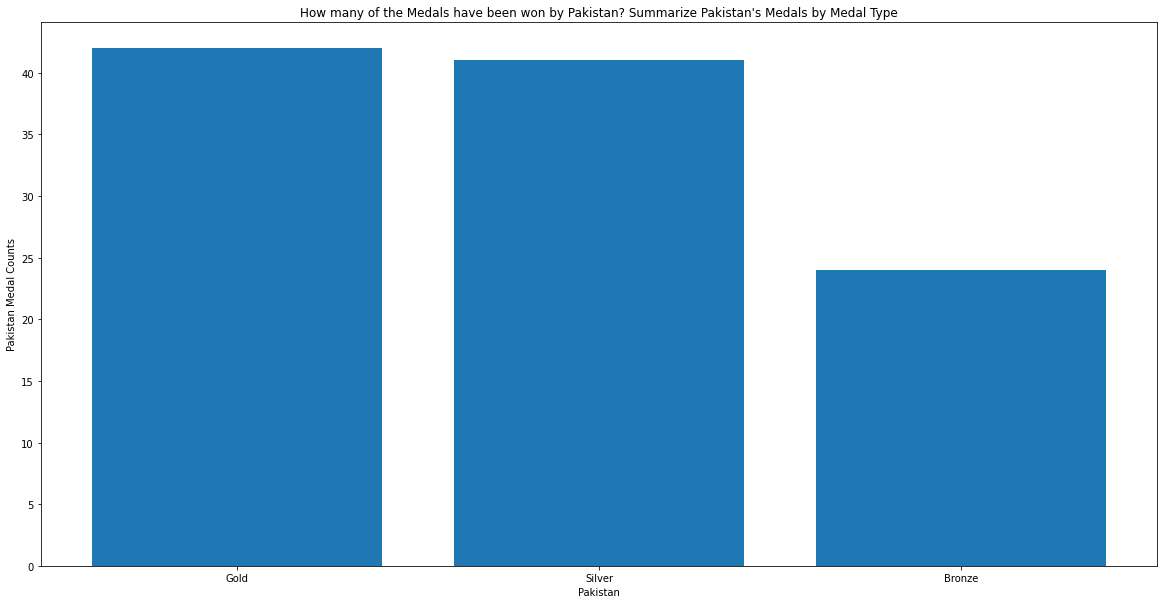

In [15]:
#visualization
fig=plt.bar(x=medals, height=medal_count)
plt.title('How many of the Medals have been won by Pakistan? Summarize Pakistan\'s Medals by Medal Type')
plt.xlabel('Pakistan')
plt.ylabel('Pakistan Medal Counts')
plt.show()

Pakistan has won 107 medals altogether 

## Your Turn: Brainstorm Questions

> QUESTION 1: Top 10 athletes who've won most medals?



> QUESTION 2: What is the sport in which athletes have won most medals?



> QUESTION 3: Which Country has the most medals in Winter Olympics?


With each question, you are required to have two cells:
1. Answering the question using code (Pandas)
2. Visualizing your results (Matplotlib or Seaborn)

#### Answer 1
Q1. Top 10 athletes who've won most medals?

In [16]:
athlete_count= fixed_data.groupby('Name')
athlete_names=athlete_count['Name'].count().sort_values(ascending=False).head(10)

athlete_names

Name
Michael Fred Phelps, II                            28
Larysa Semenivna Latynina (Diriy-)                 18
Nikolay Yefimovich Andrianov                       15
Ole Einar Bjrndalen                                13
Borys Anfiyanovych Shakhlin                        13
Takashi Ono                                        13
Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)    12
Sawao Kato                                         12
Natalie Anne Coughlin (-Hall)                      12
Ryan Steven Lochte                                 12
Name: Name, dtype: int64

<AxesSubplot:xlabel='Name'>

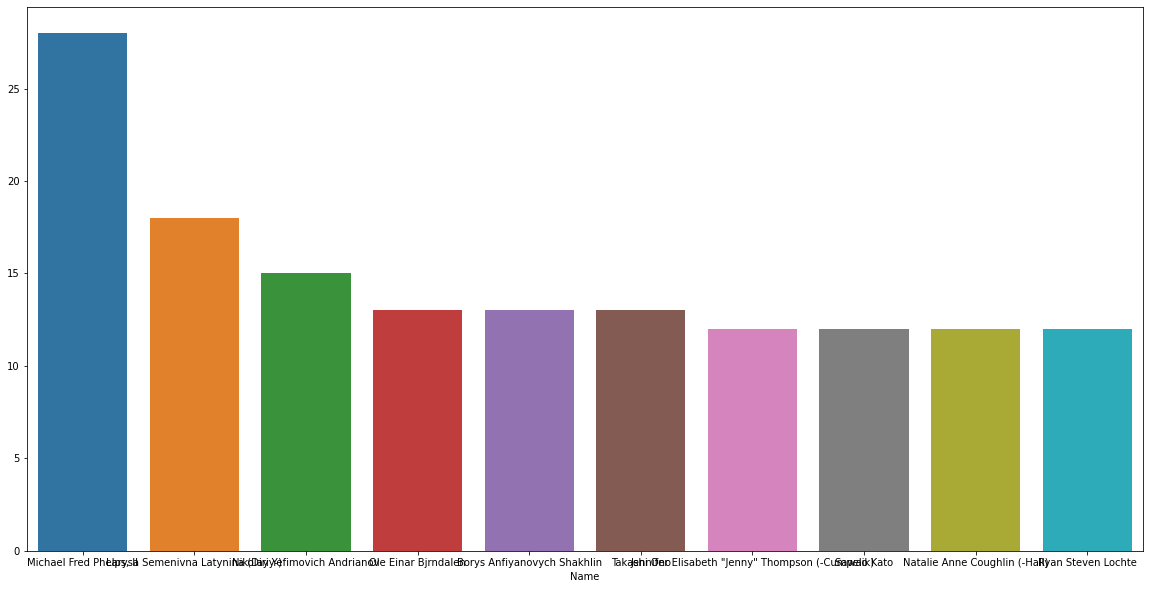

In [17]:
#visualization
sns.barplot(x=athlete_names.index, y=athlete_names.values)


Note: The names of the athletes are too big to fit in the visualization, but the code is absolutely working

#### Answer 2
Q2. what is the sport in which athletes have won most medals?

In [18]:
common_sport=fixed_data['Sport'].value_counts().head(10)

common_sport

Athletics     3648
Swimming      2486
Rowing        2104
Ice Hockey    1301
Hockey        1168
Gymnastics    1161
Fencing       1109
Football      1084
Canoeing      1041
Basketball    1000
Name: Sport, dtype: int64

<AxesSubplot:>

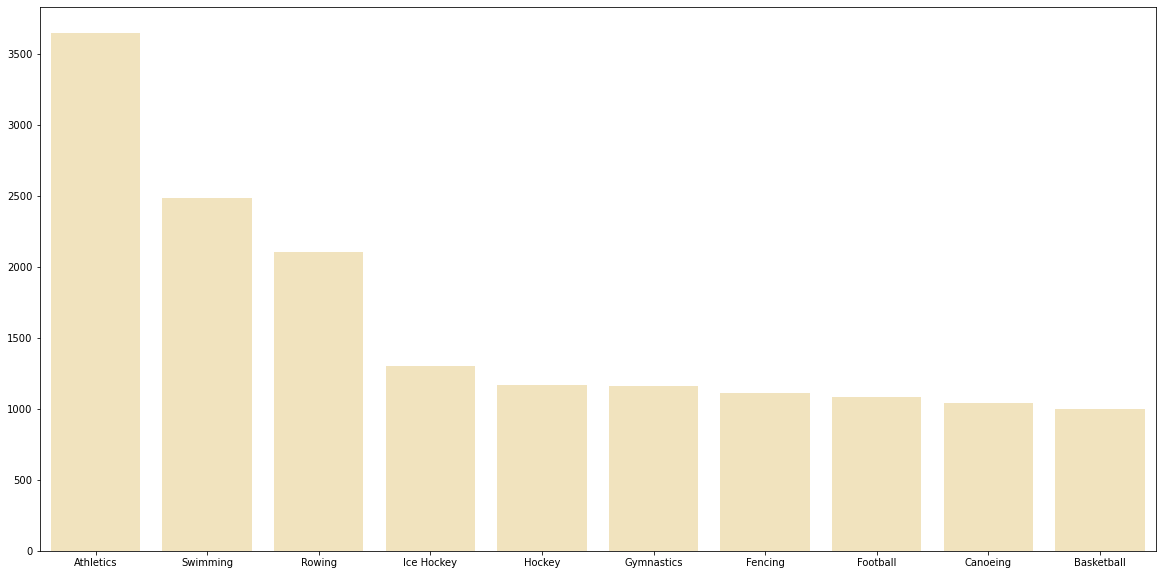

In [19]:
#visulization
sns.barplot(x=common_sport.index,y=common_sport.values, color="#FAE7B5")

Athletics has the highest number of medals, therefore becoming the most common olympic sport.

#### Answer 3
Q3. Which Country has the most medals in Winter Olympics?

In [20]:
winter_medal_country = fixed_data[fixed_data['Season']=='Winter'].groupby('Team')
winter_medal_country_count= winter_medal_country['Team'].count().sort_values(ascending=False).head(10)

winter_medal_country_count

Team
Canada           495
United States    458
Finland          412
Sweden           339
Soviet Union     339
Norway           314
Germany          272
Russia           208
Austria          192
Italy            137
Name: Team, dtype: int64

<AxesSubplot:xlabel='Team'>

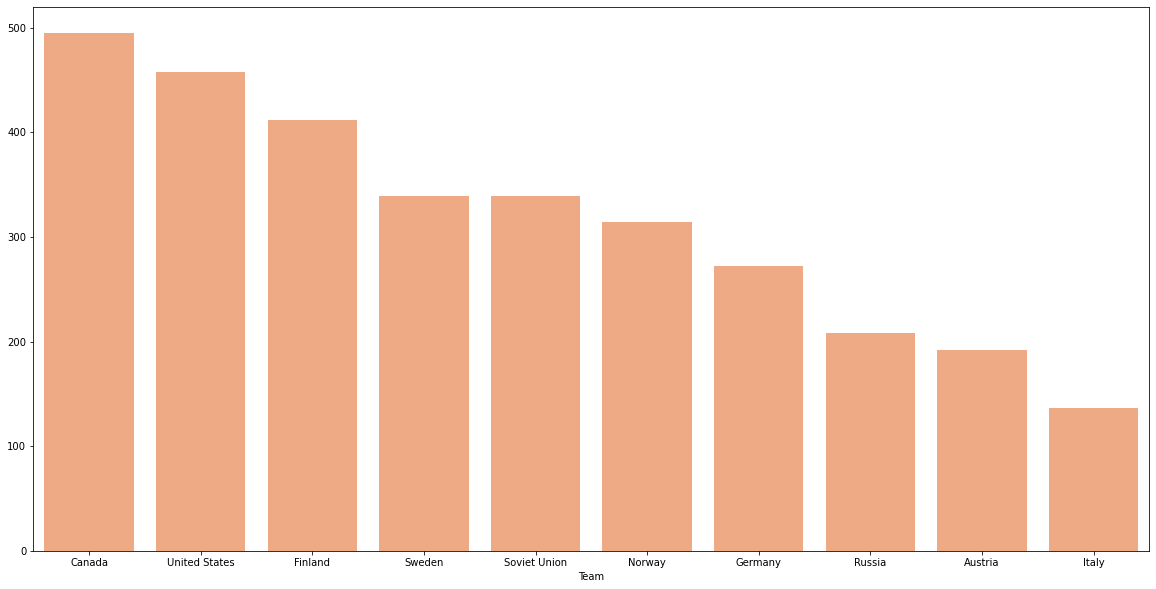

In [21]:
#visualization
sns.barplot(x=winter_medal_country_count.index,y=winter_medal_country_count.values, color="#FFA474")

Canada has the most medals in Winter Olympics

# Bonus Question

In [22]:
sup_data.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [23]:
merged_dataset=pd.merge(fixed_data,sup_data,on='NOC')

merged_dataset

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,Finland,NaN
1,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland,NaN
2,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
3,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
4,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30167,95871,Silvia Poll Ahrens,F,17.0,192.0,75.0,Costa Rica,CRC,1988 Summer,1988,Summer,Seoul,Swimming,Swimming Women's 200 metres Freestyle,Silver,Costa Rica,NaN
30168,104592,Ahmed Salah Houssein,M,31.0,180.0,64.0,Djibouti,DJI,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Men's Marathon,Bronze,Djibouti,NaN
30169,117747,Zersenay Tadesse Habtesilase,M,22.0,160.0,54.0,Eritrea,ERI,2004 Summer,2004,Summer,Athina,Athletics,"Athletics Men's 10,000 metres",Bronze,Eritrea,NaN
30170,119943,Obadele Olutosin Thompson,M,24.0,182.0,78.0,Barbados,BAR,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Men's 100 metres,Bronze,Barbados,NaN


I've used innerjoin technique via the merge function to join the two datasets together.